PROJECT-1 : EDA of Iris Dataset

In [73]:
# Importing all required Libraries

import pandas as pd             # Pandas a python library mainly useful for data analysis.
import numpy as np              #Numeric Python is useful while working with numbers.
import matplotlib.pyplot as plt #This Library helps us in plotting different plots
import seaborn as sns           #Seaborn is helpful in delivering us beautiful plots
 

%matplotlib inline

In [74]:
# Extracting the Iris dataset
df = pd.read_csv('Iris.csv')

#Loading the dataset into the notebook.

In [75]:
##Columns present in the dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [76]:
# Complete Basic Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are a total of 150 data points with 5 features

In [77]:
#Checking for null values

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This says us that our dataset has no null values

In [78]:
# Checking the first few rows of the dataset using head()

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
# Description about all the columns except the predictor column

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [80]:
df.value_counts('Species')     #Counting the number of different species available in the dataset.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

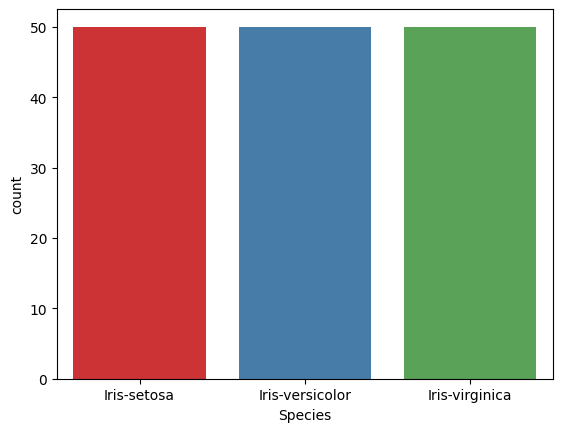

In [81]:
sns.countplot(x='Species', data=df,hue='Species',palette='Set1')  #Repeting the same but with a plot.


This dataset is well balanced with equal number of different species

In [82]:
df1 = df.drop('Id', axis=1)

In the above code snippet we have done two major tasks
First we had duplicated the original dataframe, so that we can completely workout with the data and also assure that the original data is safe.
In the latter task we had dropped the column "Id" which is least required.

In [83]:
df1.head()
#Checking the first 5 columns of the dataset.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


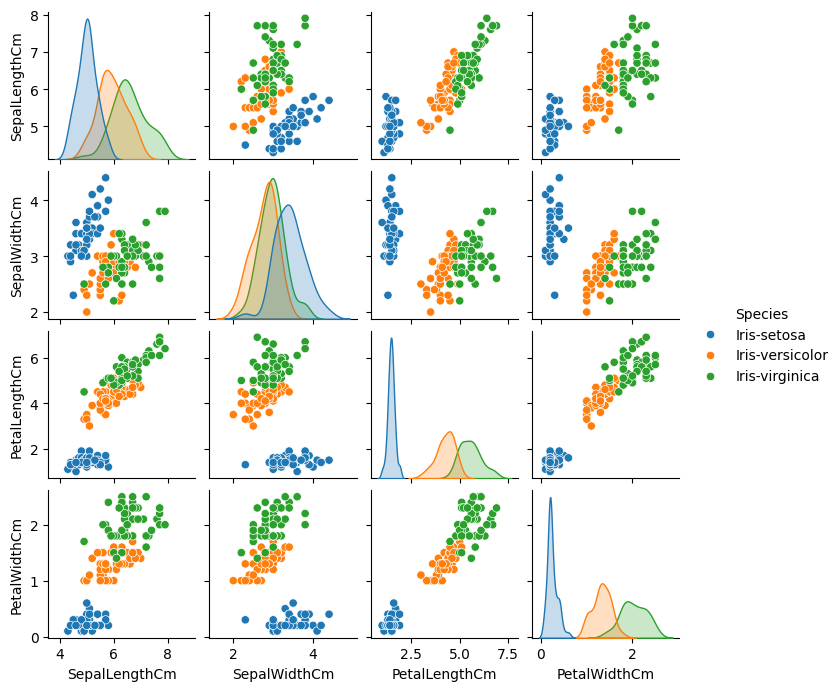

In [84]:
sns.pairplot(df1, hue='Species', height=1.75)   #Pairplot shows us the pairwise relationships for the selected columns.

<Axes: >

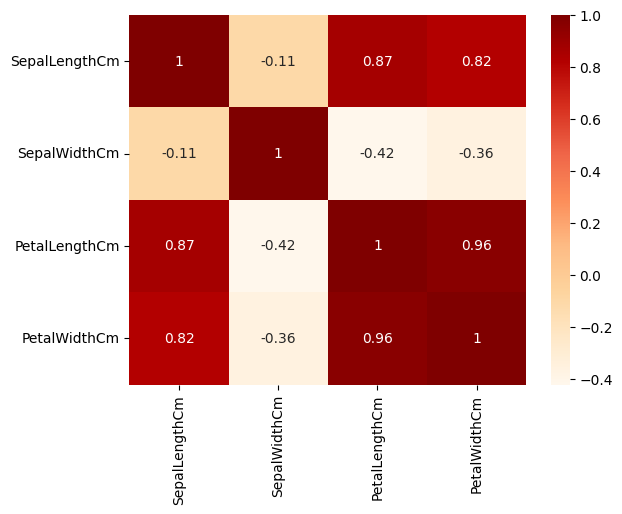

In [85]:
sns.heatmap(data=df1.drop('Species',axis=1).corr(),cmap='OrRd', annot=True)  #This plot shows us how correlated the features are.

From the above heatmap I can find that PetalLengthCm and PetalWidthCm holds good correlation and SepalWidthCm has the worst correlation with the features related to Petals.

Let's check feature's measures of central tendency of different species respectively.

In [86]:
df1.groupby('Species').agg(['mean','median','max','min'])

SepalLengthCm                  SepalWidthCm                   \
                         mean median  max  min         mean median  max  min   
Species                                                                        
Iris-setosa             5.006    5.0  5.8  4.3        3.418    3.4  4.4  2.3   
Iris-versicolor         5.936    5.9  7.0  4.9        2.770    2.8  3.4  2.0   
Iris-virginica          6.588    6.5  7.9  4.9        2.974    3.0  3.8  2.2   

                PetalLengthCm                  PetalWidthCm                   
                         mean median  max  min         mean median  max  min  
Species                                                                       
Iris-setosa             1.464   1.50  1.9  1.0        0.244    0.2  0.6  0.1  
Iris-versicolor         4.260   4.35  5.1  3.0        1.326    1.3  1.8  1.0  
Iris-virginica          5.552   5.55  6.9  4.5        2.026    2.0  2.5  1.4

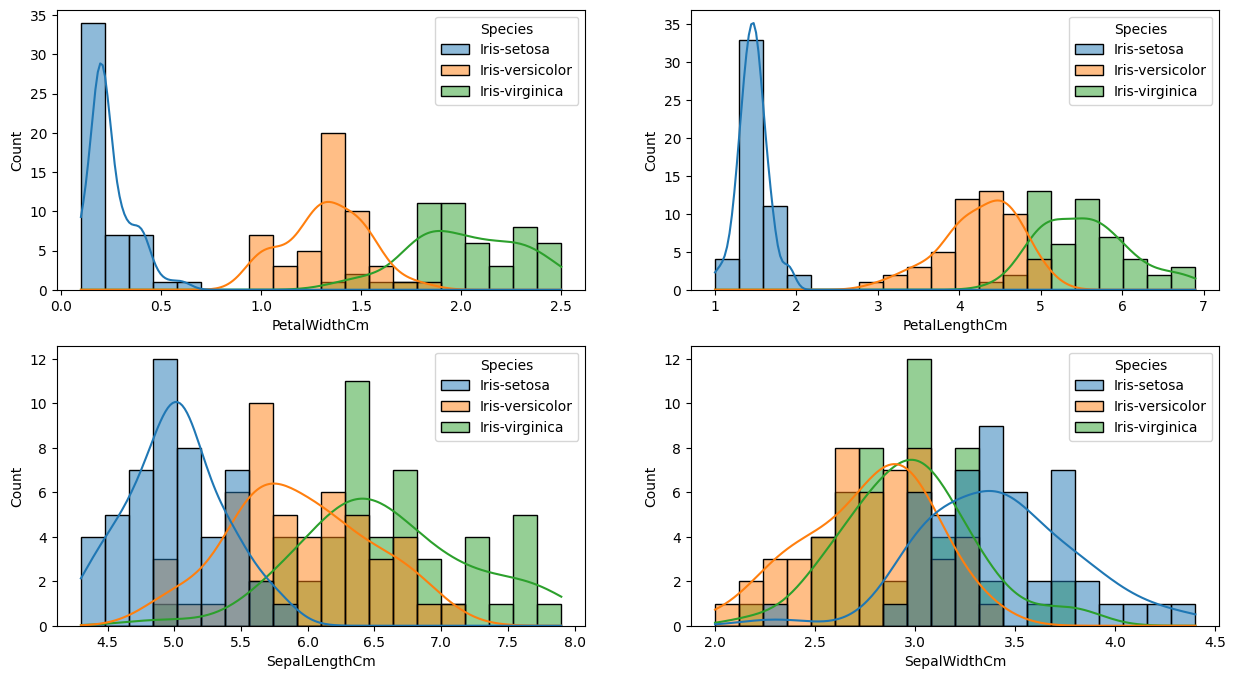

In [87]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(df,x='PetalWidthCm',bins=20,hue='Species',kde=True,ax=axes[0,0])
sns.histplot(df,x='PetalLengthCm',bins=20,hue='Species',kde=True,ax=axes[0,1])
sns.histplot(df,x='SepalLengthCm',bins=20,hue='Species',kde=True,ax=axes[1,0])
sns.histplot(df,x='SepalWidthCm',bins=20,hue='Species',kde=True,ax=axes[1,1])
plt.show()

From the above plots we can see that the species "Iris-setosa" has three of its features except SepalWidth less in length than other species. Whereas "Iris-versicolor" stand in second position and "Iris-virginica" has all of its features more lengthier.

Box Plot shows the distribution of the data quantitatively.
Box Plot tells information about 6 things.
The bottom line of the box plot is the minimum value of that particular feature.
The bottom line of the box in the plot represents the 25th percentile of the data.
The mid line in the plot represents median or 5oth percentile.
The above line of the box represents 75th percentile of the data.
And the topmost line says about the maximum value.
Interestingly, here bottom we can find few circles completely outiside the plot, these are called outliers. 


Wait how outliers are decided?
These are decided based on Interquartile range(IQR) which is the difference between 75th percentile and 25th percentile. 
The point which completely fall below (value at 25th percentile - 1.5*IQR) or above (1.5*IQR + value at 75th percentile) are termed as outliers.


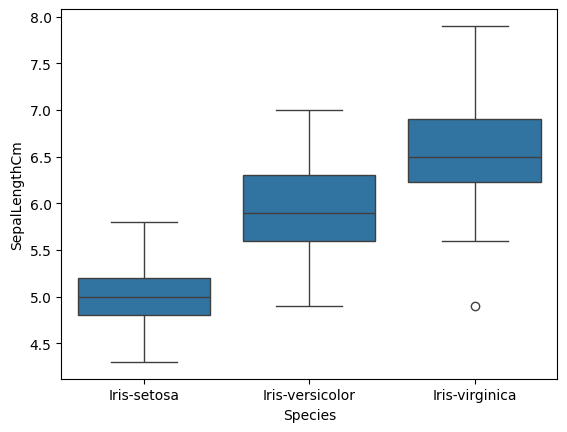

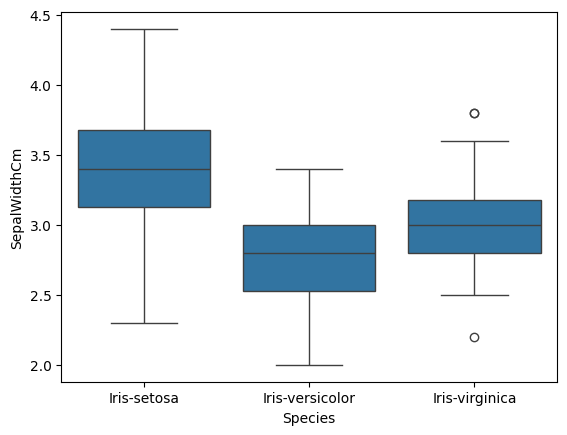

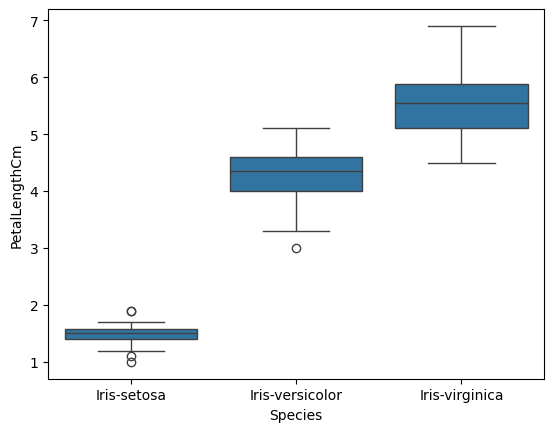

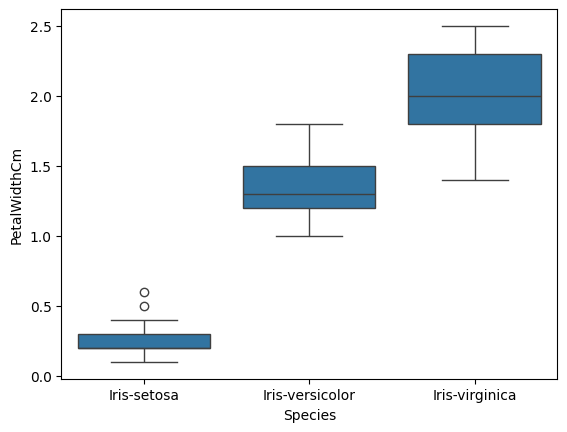

In [88]:
#function for boxplot

def box(feature):
    sns.boxplot(df,x='Species',y=feature)
    plt.show()

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for i in features:
    box(i)

Replacing the Species name in the dataset with numbers for easy analysis.

In [89]:
df1.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)

Seperating the dependent and independent variables for training the model.

In [90]:
x = df1.drop(['Species'],axis=1)        #Here axis=1 will drop the entire column of the df1 dataframe.
y = df1['Species']

In [91]:
from sklearn.model_selection import train_test_split      #Helpful for splitting the dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss,jaccard_score,f1_score,confusion_matrix        #Valuation Metrics.

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y)         #Stratify=y here will split the dataset in equal distributions.

In [93]:
y_train.value_counts()        #Checking whether the split is done in equal distribution.

Species
0    40
1    40
2    40
Name: count, dtype: int64

The train_test_split has done its job well by splitting the dataset perfectly.

In [104]:
LogisticsRegMet = pd.DataFrame(columns = ['Solver','Accuracy_Score','Jaccard_Score','F1_Score'])       #Dataframe for comparing valuation metrics.

def logres(solvers,o):
    for i in solvers:
        model = LogisticRegression(solver=i,max_iter=1000)   #building the model
        model.fit(x_train,y_train)             # fitting x_train and y_train into the built model.
        predict = model.predict(x_test)        #with the model predicting the species of the testing set.

        accuracy = accuracy_score(y_test,predict)   
        jaccardscore = jaccard_score(y_test,predict,average='macro')
        f1score = f1_score(y_test,predict,average='macro')
        LogisticsRegMet.loc[o] = [i,accuracy,jaccardscore,f1score]  #adding data in the dataframe
        o = o+1

In [105]:
solvers = ['liblinear','lbfgs','newton-cg']   #different solvers.
#Liblinear solver is best while dealing with smaller datasets.
#Whereas the default solver 'lbfgs' and 'newton-cg' solver are good in the case of multiclass classification.
logres(solvers,0)

In [106]:
LogisticsRegMet

,Solver,Accuracy_Score,Jaccard_Score,F1_Score
0,liblinear,0.933333,0.877778,0.93266
1,lbfgs,1.000000,1.000000,1.00000
2,newton-cg,1.000000,1.000000,1.00000


KNN

In [107]:
for i in range(13):
    model = KNeighborsClassifier(n_neighbors=i+1)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = round(accuracy_score(y_test,pred),3)
    print (f"Accuracy Score for n_neighbors {i+1} is {accuracy}")

Accuracy Score for n_neighbors 1 is 0.967
Accuracy Score for n_neighbors 2 is 0.967
Accuracy Score for n_neighbors 3 is 0.967
Accuracy Score for n_neighbors 4 is 0.933
Accuracy Score for n_neighbors 5 is 0.933
Accuracy Score for n_neighbors 6 is 0.967
Accuracy Score for n_neighbors 7 is 0.933
Accuracy Score for n_neighbors 8 is 0.933
Accuracy Score for n_neighbors 9 is 0.967
Accuracy Score for n_neighbors 10 is 0.967
Accuracy Score for n_neighbors 11 is 0.933
Accuracy Score for n_neighbors 12 is 0.967
Accuracy Score for n_neighbors 13 is 1.0


State Vector Machine

In [98]:
lin_model = SVC(kernel='linear')

lin_model.fit(x_train,y_train)

lin_pred = lin_model.predict(x_test)

lin_acc = accuracy_score(y_test,lin_pred)
lin_f1 = f1_score(y_test,lin_pred,average='macro')


In [99]:
poly_model = SVC(kernel='poly',degree=2)

poly_model.fit(x_train,y_train)

poly_pred = poly_model.predict(x_test)

poly_acc = accuracy_score(y_test,poly_pred)
poly_f1 = f1_score(y_test,poly_pred,average='macro')

In [100]:
rbf_model = SVC()  #default model

rbf_model.fit(x_train,y_train)

rbf_pred = rbf_model.predict(x_test)

rbf_acc = accuracy_score(y_test,rbf_pred)
rbf_f1 = f1_score(y_test,rbf_pred,average='macro')

In [101]:
SVC_metrics = pd.DataFrame(columns=['kernel','Accuracy Score','F1 Score'])

SVC_metrics

,kernel,Accuracy Score,F1 Score


In [102]:
SVC_metrics.loc[0] = ['linear',lin_acc,lin_f1]
SVC_metrics.loc[1] = ['poly',poly_acc,poly_f1]
SVC_metrics.loc[2] = ['rbf',rbf_acc,rbf_f1]

In [103]:
SVC_metrics

,kernel,Accuracy Score,F1 Score
0,linear,0.966667,0.966583
1,poly,0.966667,0.966583
2,rbf,1.000000,1.000000
